<div>1. &nbsp; Introduction<br>2. &nbsp; Importing libraries<br>3. &nbsp; Loading the dataset<br>4. &nbsp; Analysing the dataset<br>5. &nbsp; Preprocessing the dataset<br>6. &nbsp; Training and evaluating models<br>&nbsp; &nbsp; 6.1. Working with imbalanced dataset<br>&nbsp; &nbsp; &nbsp; &nbsp;6.1.1. K nearest neighbor<br>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;6.1.1.1. chosing the optimal n_neighbours<br>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;6.1.1.2. Model application<br>&nbsp; &nbsp; &nbsp; &nbsp;6.1.2. Support vector machine<br>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;6.1.2.1. chosing optimal parameters<br>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;6.1.2.2. Model Application<br>&nbsp; &nbsp; &nbsp; &nbsp;6.1.3 Dealing with the imbalanced data automatically<br>&nbsp; &nbsp; 6.2. Balancing the training dataset<br>&nbsp; &nbsp; 6.3. Working with balanced training dataset<br>&nbsp; &nbsp; &nbsp;&nbsp;&nbsp;6.3.1. Support vector machine<br>&nbsp; &nbsp; &nbsp; &nbsp;6.3.2. K nearest neighbour<br>&nbsp; &nbsp; 6.4. Balancing the initial dataset(RandomOverSampling method)<br>&nbsp; &nbsp; 6.5. Working with initial balanced dataset<br>&nbsp; &nbsp; &nbsp;&nbsp;&nbsp;6.5.1. Support vector machine<br>&nbsp; &nbsp; &nbsp; &nbsp;6.5.2. K nearest neighbour<br>7. &nbsp; Trying other models&nbsp;<br>&nbsp; &nbsp; 7.1. Logistic regression<br>&nbsp; &nbsp; 7.2. Decision Tree Classifier<br>&nbsp; &nbsp; 7.3. Random Forest Classifier<br>8. &nbsp; Recap&nbsp;</div>

# Introduction

  In this project, we will use a standard imbalanced machine learning dataset referred to as the “E.coli” dataset, also referred to as the “protein localization sites” dataset. The dataset is credited to Kenta Nakai and was developed into its current form by Paul Horton and Kenta Nakai in their 1996 paper titled “A Probabilistic Classification System For Predicting The Cellular Localization Sites Of Proteins.” In it, they achieved a classification accuracy of 81 percent.

The dataset is comprised of 336 examples of E.coli proteins and each example is described using seven input variables calculated from the proteins amino acid sequence.

* Ignoring the sequence name, the input features are described as follows:

· mcg: McGeoch’s method for signal sequence recognition.

· gvh: von Heijne’s method for signal sequence recognition.

· lip: von Heijne’s Signal Peptidase II consensus sequence score.

· chg: Presence of charge on N-terminus of predicted lipoproteins.

· aac: score of discriminant analysis of the amino acid content of outer membrane and periplasmic proteins.

· alm1: score of the ALOM membrane-spanning region prediction program.

· alm2: score of ALOM program after excluding putative cleavable signal regions from the sequence.


* There are eight classes described as follows:

· cp: cytoplasm

· im: inner membrane without signal sequence

· pp: periplasm

· imU: inner membrane, non cleavable signal sequence

· om: outer membrane

· omL: outer membrane lipoprotein

· imL: inner membrane lipoprotein

· imS: inner membrane, cleavable signal sequence

The distribution of examples across the classes is not equal and, in some cases, severely imbalanced.

# Importing Libraies

In [205]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


# Loading the Dataset

In [206]:
col_names = ['MCG','GVH','LIP','CHG','AAC','ALM1','ALM2','SITE']
df=pd.read_csv('/content/ecoli.csv',names=col_names)
df.dataframeName = 'ecoli.csv'
df #displaying our dataset

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2,SITE
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


# Data Analysis

we start by looking for missing values in the dataset in order to clean the data



In [207]:
df.isna().sum()

MCG     0
GVH     0
LIP     0
CHG     0
AAC     0
ALM1    0
ALM2    0
SITE    0
dtype: int64



```
#there is no missing values in the dataset
```



Now, we will count the number of différent classes in our dataset

In [208]:
print(df['SITE'].value_counts())

cp     143
im      77
pp      52
imU     35
om      20
omL      5
imS      2
imL      2
Name: SITE, dtype: int64


<Axes: xlabel='SITE', ylabel='count'>

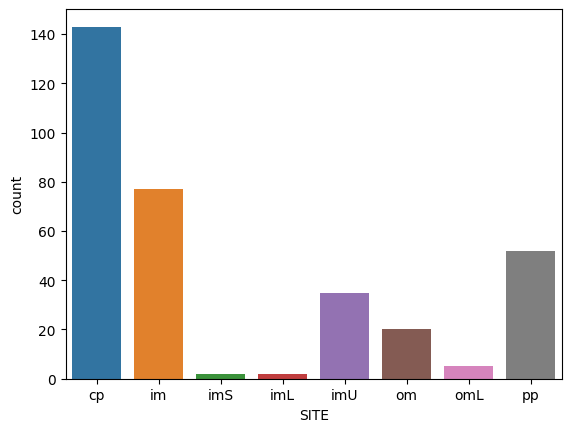

In [209]:
sns.countplot(x=df["SITE"])

There is cp 42.56 % of the data set  
There is im 22.92 % of the data set  
There is pp 15.48 % of the data set  
There is imU 10.42 % of the data set  
There is om 5.95 % of the data set  
There is omL 1.49 % of the data set  
There is imS 0.6 % of the data set  
There is imL 0.6 % of the data set

Now, we will study the correlation between different features

In [210]:
df.corr()

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2
MCG,1.000000,0.454805,0.146841,0.070266,0.220699,0.396979,0.167086
GVH,0.454805,1.000000,0.043804,0.018466,0.069824,0.173492,-0.120199
LIP,0.146841,0.043804,1.000000,0.311951,0.070190,0.095788,-0.057570
CHG,0.070266,0.018466,0.311951,1.000000,-0.044726,-0.007654,-0.052188
AAC,0.220699,0.069824,0.070190,-0.044726,1.000000,0.279482,0.252675
ALM1,0.396979,0.173492,0.095788,-0.007654,0.279482,1.000000,0.809324
ALM2,0.167086,-0.120199,-0.057570,-0.052188,0.252675,0.809324,1.000000


In [211]:
# Correlation matrix ploting
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

<ipython-input-211-bcb2f6cf5258>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


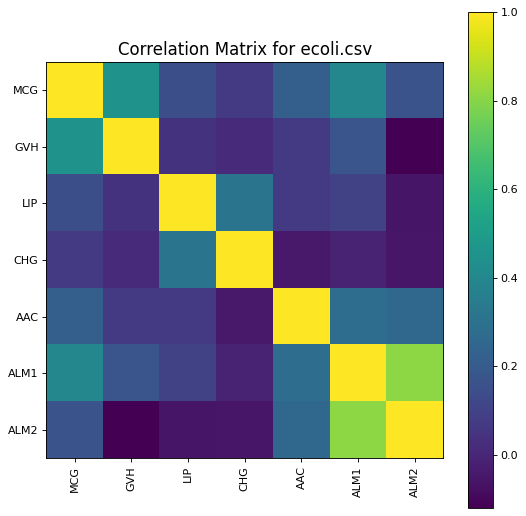

In [212]:
plotCorrelationMatrix(df, 8)

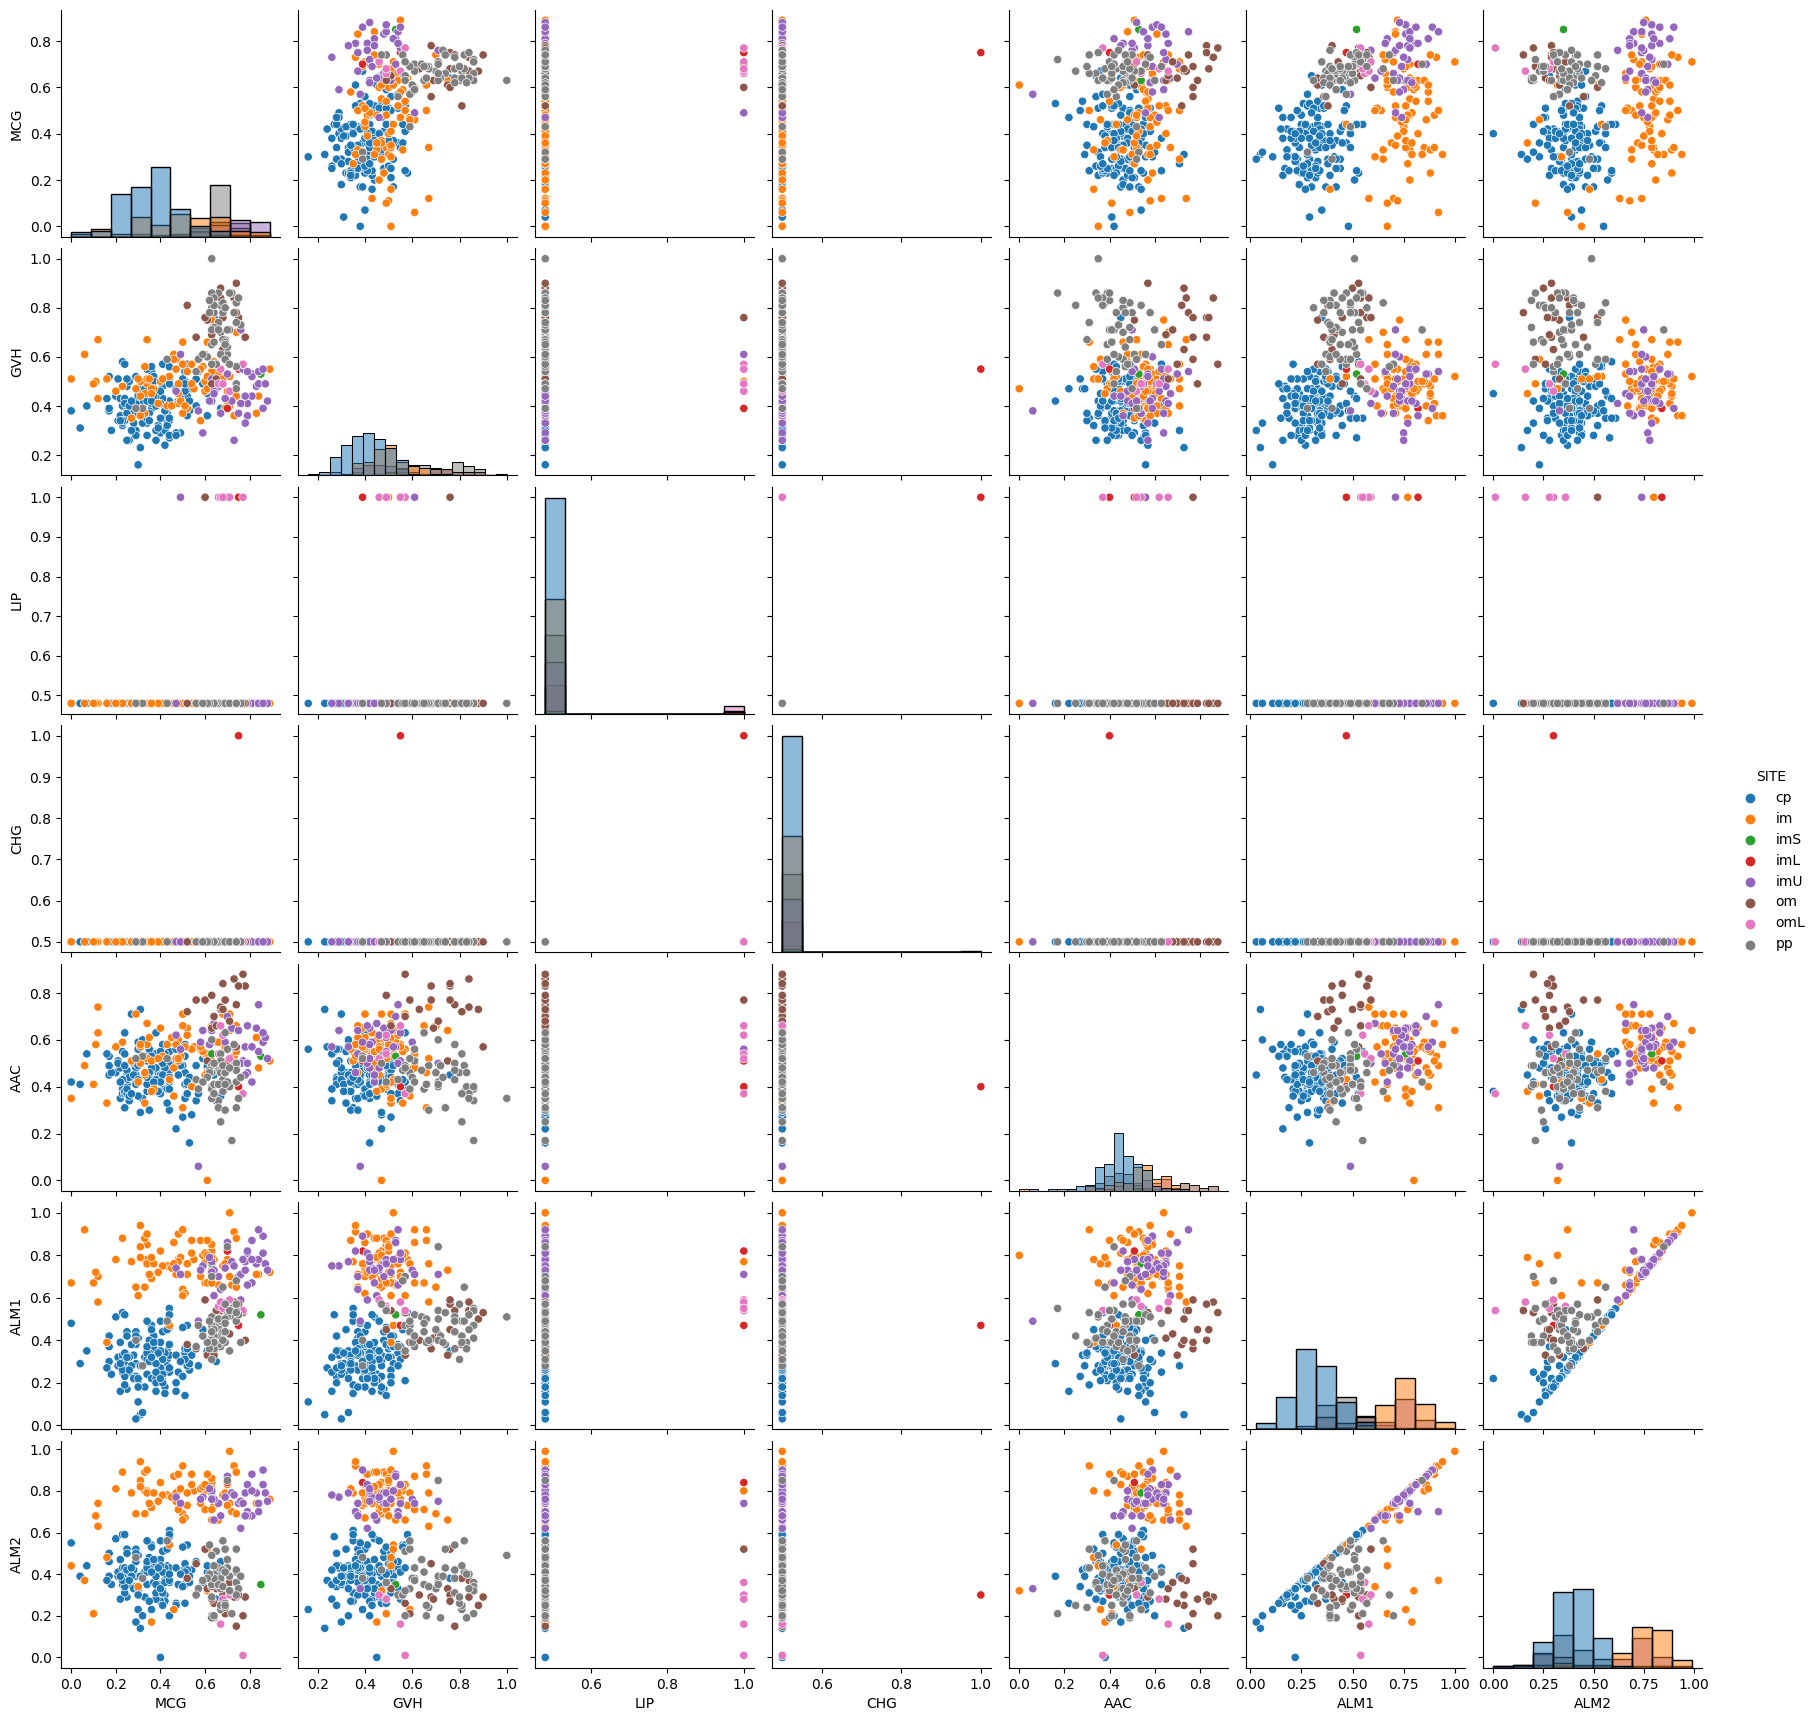

In [213]:
sns.pairplot(df,hue="SITE", diag_kind='hist')

There is some kind of linear colleration between the two variables ALM1 and ALM2, this can be illustrated by the following two figures:

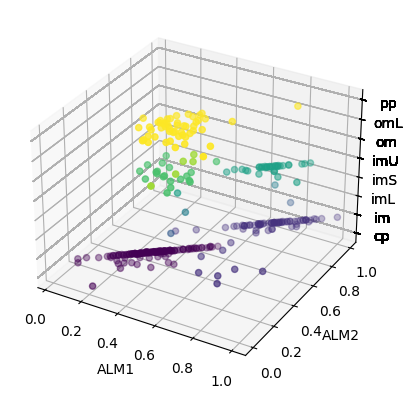

In [214]:
# Generate random data for three variables
x= df['ALM1']
y= df['ALM2']

# create an instance of LabelEncoder
le = LabelEncoder()

# example input labels
h= df['SITE']

# fit the label encoder to the input labels
le.fit(h)

# transform the input labels to numerical labels
z = le.transform(h)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis')
zticktext = h
ztickvals = z
ax.set_zticks(ztickvals)
ax.set_zticklabels(zticktext)

ax.set_xlabel('ALM1')
ax.set_ylabel('ALM2')
plt.show()

The relationship between ALM1 and ALM2 is linear.


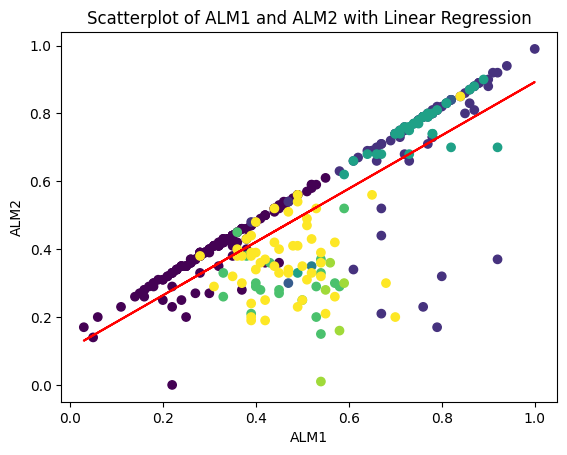

In [215]:
def linear_fit(x,y,h):
     fit = np.polyfit(x, y, 1)
     plt.scatter(x, y, c=h)
     plt.plot(x, fit[0] * x + fit[1], color='red')
     plt.xlabel('ALM1')
     plt.ylabel('ALM2')
     plt.title('Scatterplot of ALM1 and ALM2 with Linear Regression')
     plt.show()
def is_linear(x,y):
    corr_coef = np.corrcoef(x, y)[0, 1]
    if abs(corr_coef) > 0.7:
        print('The relationship between ALM1 and ALM2 is linear.')
    else:
        print('The relationship between ALM1 and ALM2 is nonlinear.')

x= df['ALM1']
y= df['ALM2']
from sklearn.preprocessing import LabelEncoder

# create an instance of LabelEncoder
le = LabelEncoder()

# example input labels
e= df['SITE']

# fit the label encoder to the input labels
le.fit(e)

# transform the input labels to numerical labels
h = le.transform(e)
def number_to_color(number):
    cmap = plt.get_cmap('viridis')
    return cmap(number)

n = [number_to_color(number) for number in h]

# Determine whether the relationship between x and y is linear or nonlinear
is_linear(x,y)

linear_fit(x,y,h)

Now, we want to visualise data distribution

In [216]:
df.describe()

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.500060,0.500000,0.495476,0.501488,0.500030,0.500179,0.499732
std,0.194634,0.148157,0.088495,0.027277,0.122376,0.215751,0.209411
min,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000
25%,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000
50%,0.500000,0.470000,0.480000,0.500000,0.495000,0.455000,0.430000
75%,0.662500,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


<Axes: xlabel='SITE', ylabel='ALM2'>

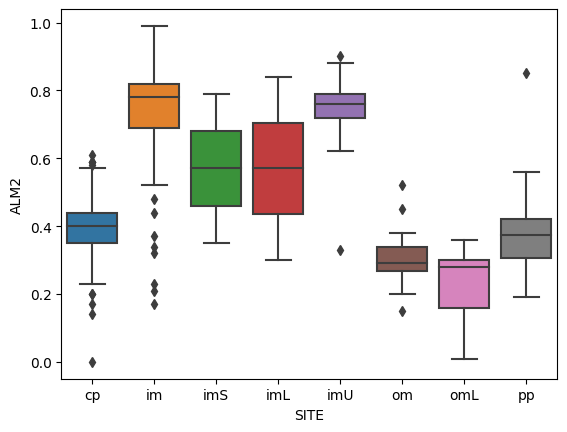

In [217]:
sns.boxplot(data=df, x="SITE", y="ALM2")

This plot shows the distribution of different classes based on the ALM2 feature.
So, we will normalize our dataset in order to make all the minimum values 0 and maximum values 1

# Preprocessing data

In [218]:
X = df.iloc[:,0:7] #Features
y = df.iloc[:,7] #Target column
print(X)
print(y)


      MCG   GVH   LIP  CHG   AAC  ALM1  ALM2
0    0.49  0.29  0.48  0.5  0.56  0.24  0.35
1    0.07  0.40  0.48  0.5  0.54  0.35  0.44
2    0.56  0.40  0.48  0.5  0.49  0.37  0.46
3    0.59  0.49  0.48  0.5  0.52  0.45  0.36
4    0.23  0.32  0.48  0.5  0.55  0.25  0.35
..    ...   ...   ...  ...   ...   ...   ...
331  0.74  0.56  0.48  0.5  0.47  0.68  0.30
332  0.71  0.57  0.48  0.5  0.48  0.35  0.32
333  0.61  0.60  0.48  0.5  0.44  0.39  0.38
334  0.59  0.61  0.48  0.5  0.42  0.42  0.37
335  0.74  0.74  0.48  0.5  0.31  0.53  0.52

[336 rows x 7 columns]
0      cp
1      cp
2      cp
3      cp
4      cp
       ..
331    pp
332    pp
333    pp
334    pp
335    pp
Name: SITE, Length: 336, dtype: object




*   Splitting the Dataset

We chose to split our data to 70% for training and 30% for testing since our dataset is not large




In [219]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=1)

print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

Training size: (235, 7)
Test size: (101, 7)


In [220]:
y_train.value_counts()

cp     98
im     53
pp     32
imU    28
om     15
omL     5
imL     2
imS     2
Name: SITE, dtype: int64

In [221]:
y_test.value_counts()

cp     45
im     24
pp     20
imU     7
om      5
Name: SITE, dtype: int64

We can see that the test data does not include samples from all the the classes. This may cause to the model to be less performant.

Since our dataset is clean, we will just rescale the train data between 0 and 1

In [222]:
#scalling
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=pd.DataFrame(scaler.transform(X_train),index=X_train.index,columns=X_train.columns)
X_test=pd.DataFrame(scaler.transform(X_test),index=X_test.index,columns=X_test.columns)

X_train.describe()

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,0.580754,0.404002,0.038298,0.004255,0.541360,0.484121,0.506168
std,0.225838,0.169724,0.192324,0.065233,0.150833,0.225384,0.215277
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.397727,0.285714,0.000000,0.000000,0.439024,0.305263,0.348485
50%,0.590909,0.380952,0.000000,0.000000,0.536585,0.442105,0.434343
75%,0.772727,0.476190,0.000000,0.000000,0.628049,0.694737,0.737374
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Training and evaluating the models

Now, after that we prepared our data, we will start training some models and evaluating their performance in order to find the one that performs the best

To measure the performance of each case, we will be based on these different performance metrix:


**Accuracy**: Accuracy measures the proportion of correctly classified instances out of all instances. It is calculated by dividing the number of correct predictions by the total number of predictions.

**Precision**: Precision measures the proportion of correctly predicted positive instances out of all predicted positive instances. It is calculated by dividing the number of true positives by the sum of true positives and false positives.

**Recall**: Recall measures the proportion of correctly predicted positive instances out of all actual positive instances. It is calculated by dividing the number of true positives by the sum of true positives and false negatives.

**F1 Score**: The F1 score is a weighted average of precision and recall. It is calculated as 2 * (precision * recall) / (precision + recall).


**Confusion matrix**: a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm. It allows easy identification of confusion between classes e.g. one class is commonly mislabeled as the other. Most performance measures are computed from the confusion matrix.


---


---


For the next section, we will start by working on the imbalanced data without trying to balance it in order to illustrate the problem of imbalanced datasets

## Working with imbalanced dataset

As it was requested in the problem statement, we will use mainly two different models: K nearest Neighbor and Support Vector Machine (Especially Support Vector Classifier)

### K nearest neighbour

Before training the k-nearest-neighbor model, we have to do a study on different hyperparameters before chosing them.

#### chosing the optimal n_neighbors and metric type


Our first approach is to plot different cross validation scores as a function of different n_neighbors values

*   Cross validation




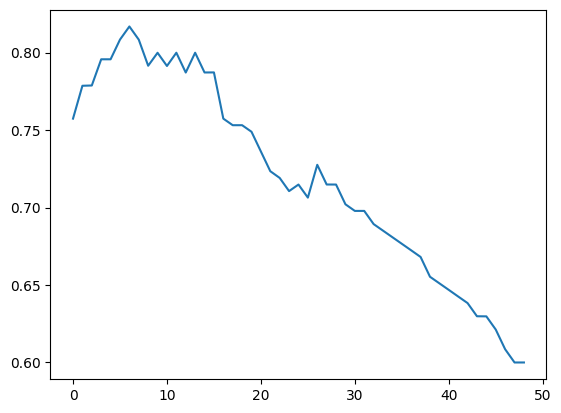

In [223]:
score=[]
for k in range(1,50):
      n=cross_val_score(KNeighborsClassifier(k),X_train,y_train,cv= 2, scoring='accuracy').mean()
      score.append(n)
plt.plot(score)

This plot presents a maximum value of the score on the value n_neighbors = 7

In order to confirm this value that we get with this cross validation method, we will use the **Grid Search** Method:



*   GridSearch



In [224]:
param_grid= {'n_neighbors':np.arange(1,50),'metric':['euclidean','manhattan','minkowski']}
grid= GridSearchCV(KNeighborsClassifier(),param_grid, cv=5)
grid.fit(X_train, y_train)
grid.best_params_

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


{'metric': 'euclidean', 'n_neighbors': 7}

So, for the following use of the k-nearest-neighbor, we will use the parameters **'metric': 'euclidean'** and **'n_neighbors': 7**


#### Application of the model

Now, we will train the model on our imbalanced dataset and get different performance metrix

In [225]:
knn = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean')
knn.fit(X_train, y_train)

print("training accuracy:",accuracy_score(y_train, knn.predict(X_train)))

training accuracy: 0.8723404255319149


In [226]:
y_pred=knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print( classification_report(y_test,y_pred ))

print('Confusion matrix :\n', confusion_matrix(y_test, y_pred))

Accuracy: 90.10%
              precision    recall  f1-score   support

          cp       0.98      0.98      0.98        45
          im       0.87      0.83      0.85        24
         imU       0.57      0.57      0.57         7
          om       1.00      0.80      0.89         5
         omL       0.00      0.00      0.00         0
          pp       0.90      0.95      0.93        20

    accuracy                           0.90       101
   macro avg       0.72      0.69      0.70       101
weighted avg       0.91      0.90      0.91       101

Confusion matrix :
 [[44  0  0  0  0  1]
 [ 0 20  3  0  0  1]
 [ 0  3  4  0  0  0]
 [ 0  0  0  4  1  0]
 [ 0  0  0  0  0  0]
 [ 1  0  0  0  0 19]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As we can see, the model does not perform very well in the omL class. Moreover, the test dataset does not include samples from all te different classes.

### Support vector machine classifier

Before training the Support Vector Classifier model, we have to do a study on different hyperparameters before chosing them using the **GridSearch** method

#### GridSearch on svm

In [227]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10,20]}
clf=GridSearchCV(SVC(),{'C':[1,10,20],'kernel':['rbf','linear']},cv=2,return_train_score=False)
clf.fit(X_train, y_train)
pd.DataFrame(clf.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.808417
1,1,linear,0.786940
2,10,rbf,0.791504
3,10,linear,0.799906
4,20,rbf,0.766008
5,20,linear,0.795669


For the following use of the Support Vector Machine model, we will use the parameters **C=1** and **kernel: 'rbf'**

#### Application of the model

Now, we will train the model on our imbalanced dataset and get different performance metrix

In [228]:
svc = SVC(kernel = 'rbf', random_state = 0, C=1)
svc.fit(X_train, y_train)

print("training accuracy:",accuracy_score(y_train, svc.predict(X_train)))

training accuracy: 0.8851063829787233


In [229]:
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print( classification_report(y_test,svc.predict(X_test)) )
print('Confusion matrix :\n', confusion_matrix(y_test, y_pred))

Accuracy: 90.10%
              precision    recall  f1-score   support

          cp       0.98      0.98      0.98        45
          im       0.87      0.83      0.85        24
         imU       0.50      0.57      0.53         7
          om       1.00      0.80      0.89         5
         omL       0.00      0.00      0.00         0
          pp       0.95      0.95      0.95        20

    accuracy                           0.90       101
   macro avg       0.72      0.69      0.70       101
weighted avg       0.91      0.90      0.91       101

Confusion matrix :
 [[44  0  0  0  0  1]
 [ 0 20  4  0  0  0]
 [ 0  3  4  0  0  0]
 [ 0  0  0  4  1  0]
 [ 0  0  0  0  0  0]
 [ 1  0  0  0  0 19]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As we can see, the model does not perform very well in the omL class as well. Moreover, the test dataset does not include samples from all different classes.



---

After training and evaluating these two models on our **imbalanced** dataset, we found that they don't give good results.
Hence, our goal now is to balance the dataset in order to get more performing results


### Dealing with the imbalanced data automatically (using the hyperparameter **class_weight** in the svm model)

We will start by adding the hyperparameter class_weight = 'balanced', this will make the model dealing with the imbalanced data automatically

In [230]:
svc = SVC(kernel = 'rbf', random_state = 0,class_weight='balanced')
svc.fit(X_train, y_train)

print("training accuracy:",accuracy_score(y_train, svc.predict(X_train)))

training accuracy: 0.8595744680851064


In [231]:
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print( classification_report(y_test,y_pred) )
print('Confusion matrix :\n', confusion_matrix(y_test, y_pred))

Accuracy: 92.08%
              precision    recall  f1-score   support

          cp       0.98      0.98      0.98        45
          im       0.95      0.83      0.89        24
         imU       0.60      0.86      0.71         7
          om       1.00      0.80      0.89         5
         omL       0.00      0.00      0.00         0
          pp       0.95      0.95      0.95        20

    accuracy                           0.92       101
   macro avg       0.75      0.74      0.74       101
weighted avg       0.94      0.92      0.93       101

Confusion matrix :
 [[44  0  0  0  0  1]
 [ 0 20  4  0  0  0]
 [ 0  1  6  0  0  0]
 [ 0  0  0  4  1  0]
 [ 0  0  0  0  0  0]
 [ 1  0  0  0  0 19]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


This last method gives some good results in terms of accuracy and precision for some classes, but it doesn't work well for others since the splitted test data doesn't contain all the classes

Unfortunately, none of the models worked well for us, this is caused by the fact that we were working with the data without balancing it

---
In the next section, we will try to balance our dataset before training the different models

We will start by balancing only the **training** dataset after the splitting


## Balancing the **training** dataset

we will use SMOTE Method to balance the training data

In [232]:
y_test_copy=y_test.copy()
sm = SMOTE(k_neighbors =1,random_state=1)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (784, 7)
After OverSampling, the shape of train_y: (784,) 



*   visualization of the training dataset **before** using SMOTE method




<Axes: xlabel='SITE', ylabel='count'>

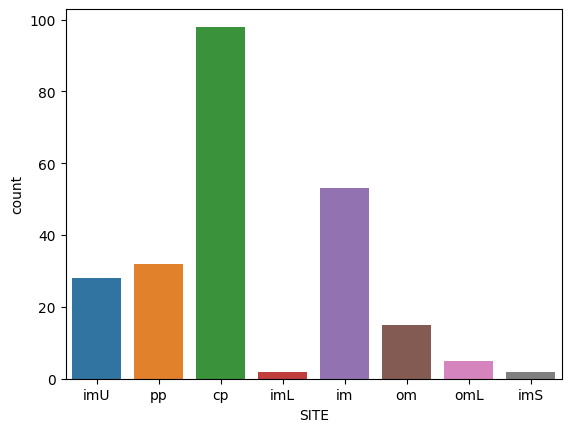

In [233]:
sns.countplot(x=y_train)

* visualization of the training dataset **after** using SMOTE method

<Axes: xlabel='SITE', ylabel='count'>

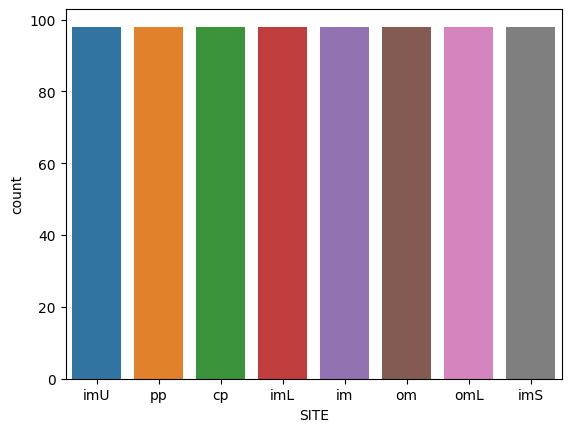

In [234]:
sns.countplot(x=y_train_res)

Now, after balancing the training dataset, we will use it to train our model

## Working with balanced **training** dataset

We will try to train the model of SVM with this augmented dataset and see if this gives more performance

### Support vector machine

In [235]:
svc = SVC(kernel = 'rbf', random_state = 0)
svc.fit(X_train_res, y_train_res)

print("training accuracy:",accuracy_score(y_train_res, svc.predict(X_train_res)))

training accuracy: 0.8864795918367347


In [236]:
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print( classification_report(y_test,y_pred) )
print('Confusion matrix :\n', confusion_matrix(y_test, y_pred))


Accuracy: 90.10%
              precision    recall  f1-score   support

          cp       0.98      0.98      0.98        45
          im       0.91      0.83      0.87        24
         imS       0.00      0.00      0.00         0
         imU       0.50      0.71      0.59         7
          om       1.00      0.60      0.75         5
          pp       0.95      0.95      0.95        20

    accuracy                           0.90       101
   macro avg       0.72      0.68      0.69       101
weighted avg       0.92      0.90      0.91       101

Confusion matrix :
 [[44  0  0  0  0  1]
 [ 0 20  0  4  0  0]
 [ 0  0  0  0  0  0]
 [ 0  2  0  5  0  0]
 [ 0  0  1  1  3  0]
 [ 1  0  0  0  0 19]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Overall, the scores that we got are better than those that we got by using the imbalanced datset.

This means that balancing the dataset is the best solution in our case

But, this still does not detect minority classes since the test dataset is still not augmented and it doesn't include all the classes

---

Now, we will try to balance all the dataset before splitting it to compare the results with the previous ones despite this can lead to an overfitting problem.

## Balancing the **initial** dataset ( SMOTE method )

In [237]:
sm = SMOTE(k_neighbors =1,random_state=1)
X_res, y_res = sm.fit_resample(X, y)

<Axes: xlabel='SITE', ylabel='count'>

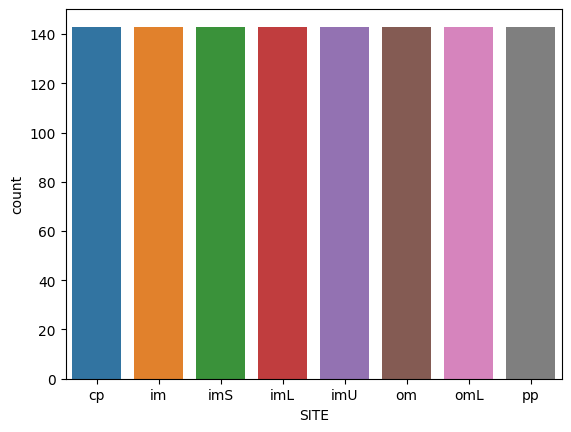

In [238]:
sns.countplot(x=y_res)

Now, all the dataset was augmented using the SMOTE method

We will split it and use it to train the models

In [239]:
X_train_smote,X_test_smote,y_train_smote,y_test_smote=train_test_split(X_res,y_res,train_size=0.7,random_state=1)

## Working with balanced **initial** dataset

### Support vector machine

In [240]:
svc = SVC(kernel = 'rbf', random_state = 0)
svc.fit(X_train_smote, y_train_smote)

print("training accuracy:",accuracy_score(y_train_smote, svc.predict(X_train_smote)))

training accuracy: 0.935


In [241]:
y_pred = svc.predict(X_test_smote)
accuracy = accuracy_score(y_test_smote, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print( classification_report(y_test_smote,svc.predict(X_test_smote)) )
print('Confusion matrix :\n', confusion_matrix(y_test_smote, y_pred))

Accuracy: 92.44%
              precision    recall  f1-score   support

          cp       0.94      0.98      0.96        50
          im       0.86      0.76      0.81        41
         imL       1.00      1.00      1.00        38
         imS       0.93      0.91      0.92        43
         imU       0.78      0.93      0.85        46
          om       1.00      0.95      0.98        42
         omL       1.00      1.00      1.00        41
          pp       0.93      0.86      0.89        43

    accuracy                           0.92       344
   macro avg       0.93      0.92      0.93       344
weighted avg       0.93      0.92      0.92       344

Confusion matrix :
 [[49  0  0  0  0  0  0  1]
 [ 0 31  0  2  8  0  0  0]
 [ 0  0 38  0  0  0  0  0]
 [ 0  0  0 39  4  0  0  0]
 [ 0  3  0  0 43  0  0  0]
 [ 0  0  0  0  0 40  0  2]
 [ 0  0  0  0  0  0 41  0]
 [ 3  2  0  1  0  0  0 37]]


This gives a significant results that show higher scores and the detection of all the classes. 

Now, all the classes are presented in the test data

### K nearest neighbour

Now, we will try KNN model to compare its performance to SVM one

In [242]:
knn = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean')
knn.fit(X_train_smote, y_train_smote)

print("training accuracy:",accuracy_score(y_train_smote, knn.predict(X_train_smote)))

training accuracy: 0.955


In [243]:
y_pred=knn.predict(X_test_smote)
accuracy = accuracy_score(y_test_smote, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print( classification_report(y_test_smote,y_pred) )
print('Confusion matrix :\n', confusion_matrix(y_test_smote, y_pred))

Accuracy: 95.06%
              precision    recall  f1-score   support

          cp       0.94      0.98      0.96        50
          im       1.00      0.80      0.89        41
         imL       0.97      1.00      0.99        38
         imS       0.93      1.00      0.97        43
         imU       0.85      0.96      0.90        46
          om       0.98      1.00      0.99        42
         omL       1.00      1.00      1.00        41
          pp       0.97      0.86      0.91        43

    accuracy                           0.95       344
   macro avg       0.96      0.95      0.95       344
weighted avg       0.95      0.95      0.95       344

Confusion matrix :
 [[49  0  0  0  0  0  0  1]
 [ 0 33  0  2  6  0  0  0]
 [ 0  0 38  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0]
 [ 0  0  1  1 44  0  0  0]
 [ 0  0  0  0  0 42  0  0]
 [ 0  0  0  0  0  0 41  0]
 [ 3  0  0  0  2  1  0 37]]


The results that we got are very interesting; we can see from the confusion matrix that we got less prediction errors despite the fact that this SMOTE technique that we used can cause overfitting. But, doing this is better than neglecting some classes (as it is the case when we augmented only the train data)

In comparaison between SVM model and KNN one, we can affirme that overall, **KNN is more performant**.

---

For the next section, we will try to do the augmentation using another technique, which is the Random Over Sampling method to see if this technique performs better than the SMOTE one.

## Balancing the **initial** dataset ( RandomOverSampling method )

In [244]:
rm = RandomOverSampler(random_state=2)

X_res, y_res = rm.fit_resample(X, y)
X_train_random,X_test_random,y_train_random,y_test_random=train_test_split(X_res,y_res,train_size=0.7,random_state=1)


print('After OverSampling, the shape of train_X: {}'.format(X_train_random.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_random.shape))

After OverSampling, the shape of train_X: (800, 7)
After OverSampling, the shape of train_y: (800,) 



<Axes: xlabel='SITE', ylabel='count'>

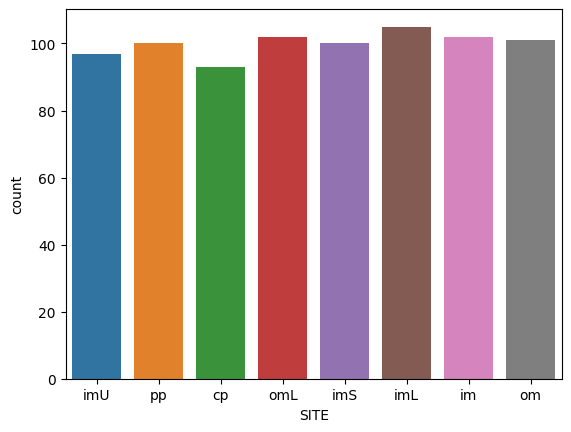

In [245]:
sns.countplot(x=y_train_random)

Now, the dataset is balanced using the Random Over Sampling.

## Working with balanced **initial** dataset

### Support vector machine

In [246]:
svc = SVC(kernel = 'rbf', random_state = 0)
svc.fit(X_train_random, y_train_random)


print("training accuracy:",accuracy_score(y_train_random, svc.predict(X_train_random)))

training accuracy: 0.9125


In [247]:
y_pred = svc.predict(X_test_random)

accuracy = accuracy_score(y_test_random, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print( classification_report(y_test_random,y_pred))
print('Confusion matrix :\n', confusion_matrix(y_test_random, y_pred))

Accuracy: 89.24%
              precision    recall  f1-score   support

          cp       0.94      0.98      0.96        50
          im       0.88      0.68      0.77        41
         imL       1.00      1.00      1.00        38
         imS       0.68      1.00      0.81        43
         imU       0.89      0.72      0.80        46
          om       0.95      0.93      0.94        42
         omL       1.00      1.00      1.00        41
          pp       0.90      0.84      0.87        43

    accuracy                           0.89       344
   macro avg       0.91      0.89      0.89       344
weighted avg       0.90      0.89      0.89       344

Confusion matrix :
 [[49  0  0  0  0  0  0  1]
 [ 1 28  0  8  4  0  0  0]
 [ 0  0 38  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0]
 [ 0  4  0  9 33  0  0  0]
 [ 0  0  0  0  0 39  0  3]
 [ 0  0  0  0  0  0 41  0]
 [ 2  0  0  3  0  2  0 36]]


These results show that the model works well, but it does perform worst than the case of SMOTE augmentation

### K nearest neighbor


In [248]:
knn = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean')
knn.fit(X_train, y_train)

print("training accuracy:",accuracy_score(y_train_random, knn.predict(X_train_random)))

training accuracy: 0.61125


In [249]:
y_pred=knn.predict(X_test_random)

accuracy = accuracy_score(y_test_random, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print( classification_report(y_test_random,y_pred))

print('Confusion matrix :\n', confusion_matrix(y_test_random, y_pred))

Accuracy: 57.85%
              precision    recall  f1-score   support

          cp       0.89      1.00      0.94        50
          im       0.42      0.90      0.57        41
         imL       0.00      0.00      0.00        38
         imS       0.00      0.00      0.00        43
         imU       0.87      0.28      0.43        46
          om       1.00      0.45      0.62        42
         omL       0.49      1.00      0.66        41
          pp       0.47      0.91      0.62        43

    accuracy                           0.58       344
   macro avg       0.52      0.57      0.48       344
weighted avg       0.54      0.58      0.49       344

Confusion matrix :
 [[50  0  0  0  0  0  0  0]
 [ 2 37  0  0  2  0  0  0]
 [ 0  0  0  0  0  0 38  0]
 [ 0 19  0  0  0  0  0 24]
 [ 1 31  0  0 13  0  1  0]
 [ 0  0  0  0  0 19  3 20]
 [ 0  0  0  0  0  0 41  0]
 [ 3  1  0  0  0  0  0 39]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


These results show that the model doesn't work well, it does perform worst than the case of SMOTE augmentation.



Hence, the final conclusion is that the model which performs the best is when we choose to do **SMOTE** method to the **initial** dataset while using the **K nearest neighbor** algorithm.

To conclude our search, we will try to compare the results that we found using our most performing model (KNN) to other models of classification; especially : Logistic Regression, Decision Tree, and Random Forest

# Trying other models to evaluate their results

### Logistic Regression

In [250]:
log = LogisticRegression(random_state = 0,max_iter=200)
log.fit(X_train_smote, y_train_smote)
print("training accuracy:",accuracy_score(y_train_smote, log.predict(X_train_smote)))

training accuracy: 0.8725


In [251]:
y_pred = log.predict(X_test_smote)

accuracy = accuracy_score(y_test_random, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print( classification_report(y_test_random,y_pred))
print('Confusion matrix :\n', confusion_matrix(y_test_smote, y_pred))

Accuracy: 86.92%
              precision    recall  f1-score   support

          cp       0.94      0.98      0.96        50
          im       0.85      0.71      0.77        41
         imL       0.97      1.00      0.99        38
         imS       0.82      0.77      0.80        43
         imU       0.66      0.87      0.75        46
          om       0.93      0.88      0.90        42
         omL       0.93      1.00      0.96        41
          pp       0.94      0.74      0.83        43

    accuracy                           0.87       344
   macro avg       0.88      0.87      0.87       344
weighted avg       0.88      0.87      0.87       344

Confusion matrix :
 [[49  1  0  0  0  0  0  0]
 [ 0 29  0  1 11  0  0  0]
 [ 0  0 38  0  0  0  0  0]
 [ 0  0  0 33 10  0  0  0]
 [ 0  2  1  3 40  0  0  0]
 [ 0  0  0  0  0 37  3  2]
 [ 0  0  0  0  0  0 41  0]
 [ 3  2  0  3  0  3  0 32]]


Logistic Regression is less performing in comparaison with KNN model

### Decision Tree Classifier

In [252]:
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train_smote, y_train_smote)

print("training accuracy:",accuracy_score(y_train_smote, tree.predict(X_train_smote)))

training accuracy: 1.0


In [253]:
y_pred = tree.predict(X_test_smote)

accuracy = accuracy_score(y_test_random, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print( classification_report(y_test_random,y_pred))
print('Confusion matrix :\n', confusion_matrix(y_test_smote, y_pred))

Accuracy: 92.15%
              precision    recall  f1-score   support

          cp       0.96      0.88      0.92        50
          im       0.75      0.80      0.78        41
         imL       1.00      0.95      0.97        38
         imS       0.96      1.00      0.98        43
         imU       0.85      0.89      0.87        46
          om       0.97      0.93      0.95        42
         omL       0.95      1.00      0.98        41
          pp       0.95      0.93      0.94        43

    accuracy                           0.92       344
   macro avg       0.92      0.92      0.92       344
weighted avg       0.92      0.92      0.92       344

Confusion matrix :
 [[44  4  0  0  0  0  0  2]
 [ 0 33  0  1  6  1  0  0]
 [ 0  2 36  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0]
 [ 0  4  0  1 41  0  0  0]
 [ 1  0  0  0  0 39  2  0]
 [ 0  0  0  0  0  0 41  0]
 [ 1  1  0  0  1  0  0 40]]


Overall, the Decision Tree model give good results in comparaison with previous ones

### Random Forest Classifier

In [254]:
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train_smote, y_train_smote)

print("training accuracy:",accuracy_score(y_train_smote, forest.predict(X_train_smote)))

training accuracy: 0.99875


In [255]:
y_pred = forest.predict(X_test_smote)

accuracy = accuracy_score(y_test_random, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print( classification_report(y_test_random,y_pred))
print('Confusion matrix :\n', confusion_matrix(y_test_smote, y_pred))

Accuracy: 95.93%
              precision    recall  f1-score   support

          cp       0.98      0.98      0.98        50
          im       0.92      0.85      0.89        41
         imL       1.00      1.00      1.00        38
         imS       0.98      1.00      0.99        43
         imU       0.88      0.98      0.93        46
          om       1.00      0.93      0.96        42
         omL       0.95      1.00      0.98        41
          pp       0.98      0.93      0.95        43

    accuracy                           0.96       344
   macro avg       0.96      0.96      0.96       344
weighted avg       0.96      0.96      0.96       344

Confusion matrix :
 [[49  1  0  0  0  0  0  0]
 [ 0 35  0  1  5  0  0  0]
 [ 0  0 38  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0]
 [ 0  1  0  0 45  0  0  0]
 [ 0  0  0  0  0 39  2  1]
 [ 0  0  0  0  0  0 41  0]
 [ 1  1  0  0  1  0  0 40]]


Finally, This Random Forest model perfoms the best for our dataset; all the performance metrix presented give good results.

# Recap

To summarize our work, we started by loading our dataset and visualising it to better understand its problems. We found that the main problem is that our database is imbalanced. Therefore, our project is about a **Multiclass Classification** on an **Imbalanced** Dataset. Then, we preprocessed our dataset by rescaling it.

As it was requested in the problem statement, we worked essentially with two model: **SVM** and **KNN**, and to resolve the imbalance problem, we worked with SMOTE technique.


In our first approach, we splitted the imbalanced dataset into a **training** part and a **test** one, then we trained the two given models on the train dataset. This approach does not give good results since the models can't learn very well from this data.

In order to see if we can resolve this problem automatically, we tried to add the hyperparameter **'class_weight' = 'balanced'** that allows the SVM model to balance the train data itself. This approach also does not give significant results since the test data still does not include all the classes.

In a second approach, we tried to balance **only** the **training** data using SMOTE method. We found that the accuracy increased, but this still give the same problem of not detecting some classes since we still always don't have samples from all the classes in the test dataset.

Our third approach was to balance **all** the dataset using SMOTE method before splitting it into the training part and the test one. This lead the test data to have samples from all the classes.

Overall the results that we've got from this approach were very interesting, both models perform well. In comparaison between the performance of the SVM and KNN model, we can affirme that **KNN model is better**.

In order to evaluate the performance of the SMOTE technique, we tried to use other data augmentation methods like the **RandomOverSampling** one. We found that this approach does not give good results. Hense, we can maintain working with SMOTE method on our dataset.

To have a further vision on our results, we tried to work with some other models not given in the problem statement. Finally, we found that the **Random Forest** model is the most performing one for our problem.